# 1   Using a Tagger

In [3]:
import nltk

In [4]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [5]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [6]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [7]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [8]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [9]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


# 2   Tagged Corpora

## 2.1   Representing Tagged Tokens

In [10]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [11]:
tagged_token[0]

'fly'

In [12]:
tagged_token[1]

'NN'

In [13]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN 
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC 
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS 
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB 
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT 
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

## 2.2   Reading Tagged Corpora

In [14]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [15]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [16]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [17]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [18]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [19]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [20]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [21]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

## 2.3   A Universal Part-of-Speech Tagset

In [22]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

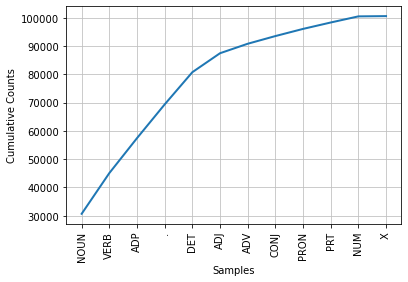

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [23]:
tag_fd.plot(cumulative=True)

## 2.4   Nouns

In [24]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

## 2.5   Verbs

In [25]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


In [26]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [27]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [28]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])

['been',
 'expected',
 'made',
 'compared',
 'based',
 'used',
 'priced',
 'sold',
 'named',
 'designed',
 'held',
 'fined',
 'taken',
 'paid',
 'traded',
 'increased',
 'said',
 'filed',
 'reached',
 'called',
 'scheduled',
 'disclosed',
 'reported',
 'proposed',
 'estimated',
 'set',
 'known',
 'built',
 'approved',
 'given',
 'acquired',
 'found',
 'offered',
 'received',
 'caused',
 'considered',
 'ordered',
 'required',
 'preferred',
 'led',
 'issued',
 'fixed',
 'listed',
 'prepared',
 'involved',
 'aimed',
 'needed',
 'launched',
 'produced',
 'put',
 'planned',
 'seen',
 'alleged',
 'valued',
 'barred',
 'become',
 'related',
 'improved',
 'changed',
 'provided',
 'come',
 'got',
 'allowed',
 'mixed',
 'suspended',
 'owned',
 'elected',
 'worried',
 'completed',
 'combined',
 'raised',
 'left',
 'placed',
 'invested',
 'fallen',
 'failed',
 'helped',
 'run',
 'opposed',
 'quoted',
 'continued',
 'threatened',
 'offset',
 'shipped',
 'eliminated',
 'followed',
 'sought',
 'hurt'

In [29]:
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]

[]

In [30]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [31]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

## 2.6   Adjectives and Adverbs

## 2.7   Unsimplified Tags

In [32]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

## 2.8   Exploring Tagged Corpora

In [33]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [34]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [35]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

try to frighten
wish to advocate
expect to see
refuse to aid
needs to stand
strives to emulate
refusing to show
seems to match
decided to rake
entitled to stay
bringing to bear
beginning to get
threaten to use
begin to play
begin to hunt
induced to see
going to hang
continue to test
choose to agree
chosen to find
compelled to conduct
need to realize
used to justify
fail to respond
intends to economize
bound to say
trying to mollify
used to say
came to reassert
choose to call
intend to re-enter
conscripted to enact
continues to feed
tried to integrate
poised to strike
try to force
attempting to reach
afford to take
forbidden to sit
plans to import
likes to imagine
used to get
trying to make
ceased to suggest
going to work
wanting to cut
choose to persuade
trying to keep
like to embark
suited to defeat
hastened to put
like to add
want to preserve
required to participate
happened to save
doing to promote
tempted to quote
continuing to capture
need to communicate
like to see
interested to 

began to fall
begun to write
made to seem
attempting to direct
pleased to call
scheduled to nominate
come to spend
managed to irrigate
stooped to scoop
fall to show
try to push
begins to deteriorate
used to like
offered to ship
hopes to find
invented to hold
learn to like
labored to set
set to receive
entered to compete
seem to make
seemed to answer
decided to use
began to show
Wishing to show
learned to set
forced to fly
hope to break
came to recognize
turning to cup
seems to creep
going to live
got to learn
learn to live
going to live
like to sew
love to run
love to crack
yearn to make
tried to see
love to dust
like to become
decide to write
cause to exist
learn to portray
learn to portray
began to advise
taught to yield
prefer to cope
helps to explain
surprised to bump
seemed to brave
begins to regard
began to embezzle
appears to endorse
expected to like
begin to assert
began to challenge
going to become
helping to make
began to stress
began to describe
fails to gain
liked to play
l

attempted to restrain
wished to continue
failed to flourish
propose to go
wished to segregate
liked to fancy
Deciding to become
strove to see
used to play
returned to live
proceeded to find
likes to catch
seems to care
intends to save
compelled to find
wishes to continue
ceasing to write
stops to ask
expected to fulfill
tailored to meet
want to say
want to quote
seems to realize
primed to catch
try to diagnose
want to point
used to regard
seems to represent
trying to draw
wish to see
used to include
allowed to operate
urged to produce
afford to present
decides to drop
expect to abolish
needed to pit
tempted to blame
hope to serve
tried to remedy
tends to express
seem to believe
permitted to return
attempted to make
prepared to demonstrate
calculated to suggest
seemed to disconcert
known to make
going to talk
learns to focus
chooses to subordinate
wish to preserve
cease to exist
seem to constitute
destined to fail
wants to get
began to understand
wanted to capture
liked to tell
decided 

pleased to note
continue to serve
pleased to note
inclined to drag
trying to get
made to enlist
try to run
designed to help
designed to reflect
designed to avoid
designed to reflect
required to help
working to develop
installed to increase
prepared to stay
used to keep
came to receive
tend to create
attempting to bring
designed to arrest
attempt to monopolize
held to appoint
prepared to submit
allowed to petition
ordered to terminate
required to pass
required to pass
permitted to endanger
compelled to testify
permitted to rebut
failed to show
permitted to rebut
refused to require
ordered to report
ordered to report
fail to see
sought to secure
failed to show
entitled to inspect
hopes to find
like to make
found to enable
need to concern
fail to bring
fail to act
want to stimulate
want to make
tended to ignore
expected to take
expected to know
expected to supervise
begins to go
moved to think
beginning to box
surprised to find
hope to win
began to talk
begins to take
decided to make
aske

needed to hire
continued to spring
extended to include
intending to use
need to commit
sought to place
want to know
want to know
serve to contrast
obligated to regard
tried to make
attempting to falsify
continued to accuse
continued to accuse
dare to instigate
acting to deliver
seeking to free
endeavoring to deliver
doomed to suffer
adopted to accomplish
fails to honor
began to mix
began to paint
trying to simulate
begun to broaden
seems to contain
tends to assert
seem to thrust
seems to thrust
shaded to pry
tend to assert
continued to remain
tried to escape
taxed to pay
come to pass
seem to believe
continues to rise
continue to charge
beginning to discover
continues to offer
wants to see
come to dominate
put to compete
refuse to acknowledge
liked to work
tend to vote
going to cure
tended to overlook
made to replace
decided to strip
made to satisfy
arranged to fit
needed to take
tried to restrict
led to speculate
intended to fill
restored to go
appear to push
began to wash
wish to addr

begun to tell
begun to question
began to doubt
wished to frighten
need to break
wished to make
tried to give
got to eat
attempt to frighten
trying to find
want to talk
refusing to bear
Try to find
want to go
like to make
going to go
Remember to tell
wanted to know
tried to think
tried to make
began to nod
began to sink
tried to think
tried to explain
going to die
going to die
managed to cover
going to believe
expected to stand
made to include
bothering to whisper
waiting to see
agreed to fill
waiting to report
going to like
going to louse
installed to film
going to see
expect to get
going to stand
try to stop
going to ask
hoping to hear
constrained to add
wants to pass
try to phone
like to sing
forced to undergo
supposed to make
wants to ask
decided to let
got to go
tried to ignore
going to keep
startled to meet
came to examine
tried to bring
reaching to release
waiting to report
used to paint
Begin to look
wanted to see
Failing to find
Try to forget
seen to leave
forced to give
inclin

wanted to call
like to offer
want to say
wished to see
overheard to say
like to get
expected to perform
going to bring
seek to storm
used to defend
shocked to find
hesitate to speak
beginning to study
grow to devote
wish to turn
going to fail
wished to change
wanted to take
wanted to bring
like to know
intend to marry
began to talk
used to play
trying to get
happen to drive
hating to get
try to walk
left to believe
tried to rest
dying to defend
used to kid
wanted to paint
going to organize
try to paint
used to hang
prepared to worship
want to stir
beginning to gather
tried to believe
used to say
began to shudder
come to understand
come to see
called to say
decided to cremate
want to meet
impelled to kneel
trying to touch
trying to flatter
trying to worry
trying to worry
want to go
like to take
wanted to know
trying to get
gone to purify
waiting to see
come to skirt
trying to make
go to sleep
tried to emulate
began to pulse
amazed to find
kneeling to tie
trying to get
trying to smile
se

In [36]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


# 3   Mapping Words to Properties Using Python Dictionaries

## 3.1   Indexing Lists vs Dictionaries

## 3.2   Dictionaries in Python

## 3.3   Defining Dictionaries

## 3.4   Default Dictionaries

In [37]:
from collections import defaultdict

alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v
alice2 = [mapping[v] for v in alice]
alice2[:100]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'UNK',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'UNK',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

In [38]:
len(set(alice2))

1001

## 3.5   Incrementally Updating a Dictionary

In [39]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1

counts['NOUN']

30654

In [40]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [41]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [42]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

## 3.6   Complex Keys and Values

In [43]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1

In [44]:
pos[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

## 3.7   Inverting a Dictionary

In [45]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1
[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

In [46]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2['N']

'ideas'

In [47]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
     pos2[value].append(key)
pos2['ADV']

['furiously', 'peacefully']

In [48]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['furiously', 'peacefully']

# 4   Automatic Tagging

In [49]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

## 4.1   The Default Tagger

In [50]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [51]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [52]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

## 4.2   The Regular Expression Tagger

In [53]:
patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                      # nouns (default)
]

In [54]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [55]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

## 4.3   The Lookup Tagger

In [56]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [57]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [58]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

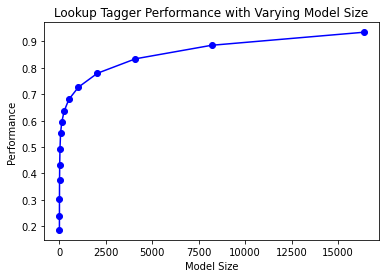

In [60]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
    
display()

## 4.4   Evaluation

# 5   N-Gram Tagging

## 5.1   Unigram Tagging

In [61]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [62]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

## 5.2   Separating the Training and Testing Data

In [63]:
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [64]:
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

## 5.3   General N-Gram Tagging

In [65]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [67]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [68]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

## 5.4   Combining Taggers

In [69]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

## 5.5   Tagging Unknown Words

## 5.6   Storing Taggers

In [70]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [71]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [72]:
text = """The board's action shows what free enterprise is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

## 5.7   Performance Limitations

In [73]:
cfd = nltk.ConditionalFreqDist(
           ((x[1], y[1], z[0]), z[1])
           for sent in brown_tagged_sents
           for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

In [74]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                 for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))      

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# 6   Transformation-Based Tagging

In [75]:
from nltk.tbl import demo as brill_demo
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

# 7   How to Determine the Category of a Word

## 7.1   Morphological Clues

## 7.2   Syntactic Clues

## 7.3   Semantic Clues

## 7.4   New Words